In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [41]:
import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
from stable_baselines import PPO2


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [75]:
df = pd.read_csv('/content/drive/MyDrive/colab/deep-stonk/btcusd.csv', thousands=',')
df.head()

,Date,Open,High,Low,Close
0,04/12/2021,59607,61224,59429,60011
1,04/11/2021,58606,60649,58599,59607
2,04/10/2021,58354,61197,57876,58621
3,04/09/2021,57677,58879,57473,58354
4,04/08/2021,56221,58134,55752,57681


In [76]:
df['Date'] = pd.to_datetime(df['Date'])

df.dtypes

Date     datetime64[ns]
Open              int64
High              int64
Low               int64
Close             int64
dtype: object

In [78]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close
Date,,,,
2021-04-12,59607,61224,59429,60011
2021-04-11,58606,60649,58599,59607
2021-04-10,58354,61197,57876,58621
2021-04-09,57677,58879,57473,58354
2021-04-08,56221,58134,55752,57681


In [81]:
df = df[::-1]
df.head()

,Open,High,Low,Close
Date,,,,
2020-04-12,6814,7196,6795,7143
2020-04-13,7143,7143,6628,6827
2020-04-14,6763,6983,6763,6872
2020-04-15,6872,6935,6696,6756
2020-04-16,6756,7145,6635,7046


In [82]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [ ]:
env.prices

info {'total_reward': -471.0, 'total_profit': 0.667650947900411, 'position': 1}


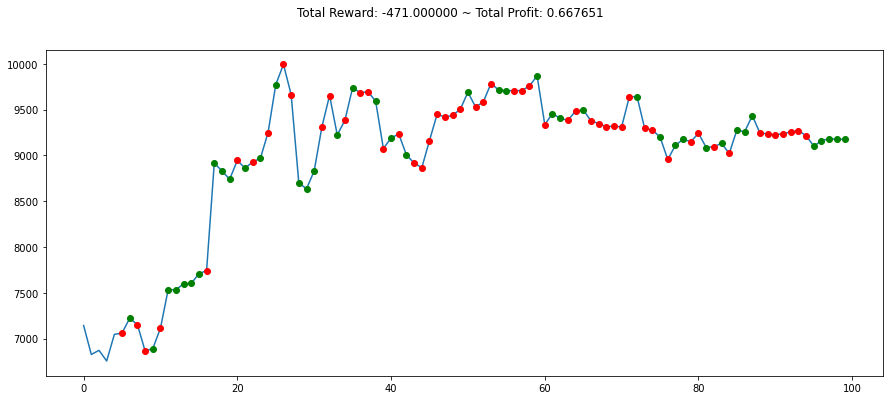

In [90]:
state = env.reset()
while True: 
  action = env.action_space.sample()
  n_state, reward, done, info = env.step(action)
  if done: 
      print("info", info)
      break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [91]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=100000)

info {'total_reward': -209.0, 'total_profit': 0.9428998223629127, 'position': 0}


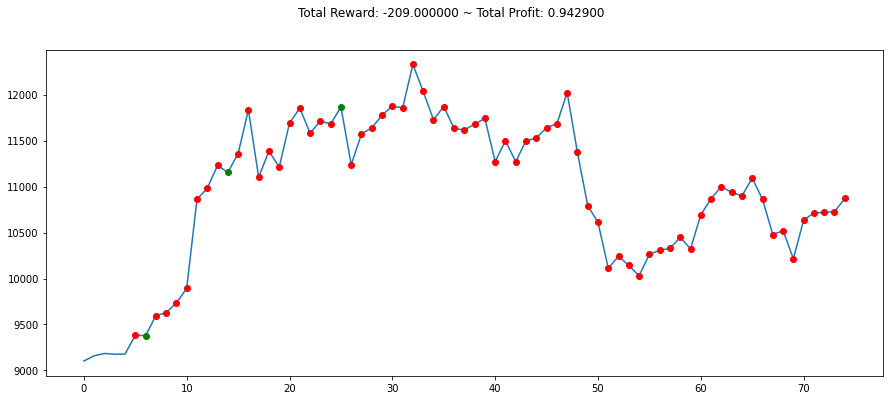

In [104]:
env = gym.make('stocks-v0', df=df, frame_bound=(100, 170), window_size=5)
obs = env.reset()
while True:
  obs = obs[np.newaxis, ...]
  action, _states = model.predict(obs)
  obs, rewards, done, info = env.step(action)
  if done:
    print('info', info)
    break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()